Analyze the effect of high dose naspm on spontaneous synaptic transmission

In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip, spon_ana
import seaborn as sns
import pickle
from matplotlib.backends.backend_pdf import PdfPages
plt.style.use('classic')

% matplotlib inline
# % matplotlib notebook

%load_ext autoreload
% autoreload 2

In [2]:
target = 175
psc_naspm_bef = pd.read_pickle('/data/psc_non_asso_50Hz_slope4_thres2.5_before_'+str(target))
psc_naspm_aft = pd.read_pickle('/data/psc_non_asso_50Hz_slope4_thres2.5_after_'+str(target))

In [3]:
psc_naspm_stim = pd.read_pickle('/data/ana_post_EI_50Hz_reci')

In [4]:
psc_naspm_stim

,Before,After,File name,elimi,spon_elimi_bef,spon_elimi_aft
36,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032701,60,"[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 27, 3...",[]
37,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032802,60,[],"[126, 128, 130, 137, 139, 141, 146, 150]"
38,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017032905,20,"[9, 10, 22, 29, 30, 32, 33, 36, 37]","[6, 8, 11, 14, 22, 27, 29]"
39,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2017053102,20,"[19, 22, 26, 39]","[14, 19, 24, 25, 34, 36]"
172,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'failur...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2018032301,40,"[0, 1, 4, 8, 10, 19, 26, 29, 30, 31]","[37, 41, 42, 53, 62, 69, 70, 72, 87, 88, 92]"
175,"{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'failure': ...","{'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, ...",2018032802,30,[23],"[51, 60, 62]"


In [5]:
psc_naspm_stim.loc[target].Before.keys()

dict_keys(['x', 'failure', 'PPR', 'raw_amp2', 'ave_amp2', 'resp2_region', 'ave_all', 'trace_y2', 'raw_amp1', 'trace_y1', 'rs', 'ir', 'onset_tau', 'decay_tau', 'ave_amp1', 'spon_trace', 'raw_onset_tau', 'raw_decay_tau', 'resp1_region'])

In [6]:
decay_tau_stim_bef = np.array(psc_naspm_stim.loc[target].Before['decay_tau'])
decay_tau_stim_aft = np.array(psc_naspm_stim.loc[target].After['decay_tau'])

decay_tau_stim_bef = decay_tau_stim_bef[~np.isnan(decay_tau_stim_bef)]
decay_tau_stim_aft = decay_tau_stim_aft[~np.isnan(decay_tau_stim_aft)]

In [7]:
amp_stim_bef = np.array(psc_naspm_stim.loc[target].Before['raw_amp1'])
amp_stim_aft = np.array(psc_naspm_stim.loc[target].After['raw_amp1'])

amp_stim_bef = amp_stim_bef[~np.isnan(amp_stim_bef)]
amp_stim_aft = amp_stim_aft[~np.isnan(amp_stim_aft)]

In [8]:
psc_naspm_stim.loc[target].Before['decay_tau']

[nan,
 nan,
 0.0011693728987595508,
 0.0014696463582899093,
 0.0014019632781640517,
 0.0014001850423041341,
 0.0015231501330005334,
 nan,
 0.0016705043826887986]

In [9]:
np.log(np.min(decay_tau_stim_bef))

-6.7512876578294208

In [10]:
para_bef, para_aft = spon_ana.pair_amp_tau(psc_naspm_bef, psc_naspm_aft)

In [11]:
log_amp_bef = np.log(para_bef['amp'])
log_amp_aft = np.log(para_aft['amp'])
log_decay_bef = np.log(para_bef['decay_tau'])
log_decay_aft = np.log(para_aft['decay_tau'])

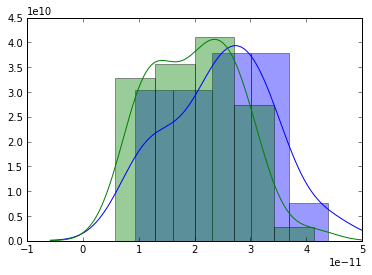

In [12]:
sns.distplot(amp_stim_bef)
sns.distplot(amp_stim_aft)
# plt.xlim([0, 1.4e-10])

(0, 1.4e-10)

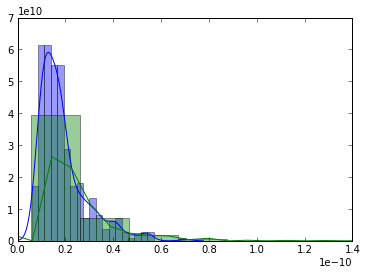

In [13]:
sns.distplot(para_bef['amp'])
sns.distplot(para_aft['amp'])
plt.xlim([0, 1.4e-10])

In [14]:
decay_tau_stim_bef

array([ 0.00116937,  0.00146965,  0.00140196,  0.00140019,  0.00152315,
        0.0016705 ])

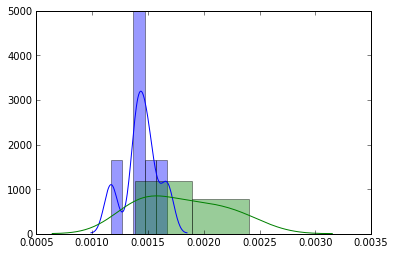

In [15]:
sns.distplot(decay_tau_stim_bef)
sns.distplot(decay_tau_stim_aft)

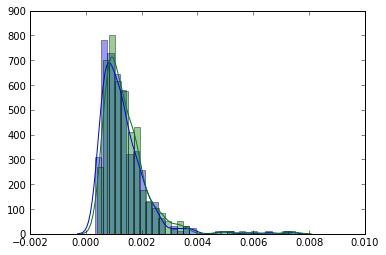

In [16]:
sns.distplot(para_bef['decay_tau'])
sns.distplot(para_aft['decay_tau'])

In [17]:
len(log_decay_bef)

412

In [18]:
len(log_decay_aft)

439

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


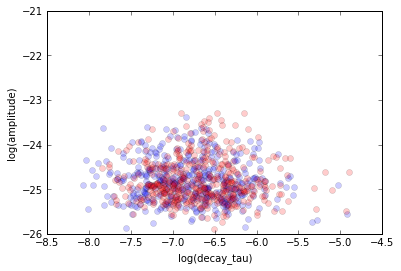

In [19]:
plt.plot(log_decay_bef,log_amp_bef, 'o', alpha=0.2)
plt.plot(log_decay_aft,log_amp_aft, 'ro', alpha=0.2)
plt.ylim([-26,-21])
plt.xlabel('log(decay_tau)')
plt.ylabel('log(amplitude)')

plt.legend()
# with PdfPages('/data/Figure3_10.pdf') as pdf:
#     pdf.savefig()

In [20]:
len(np.where(log_decay_bef<-7.5)[0])

33

In [21]:
len(np.where(log_decay_aft<-7.5)[0])

19

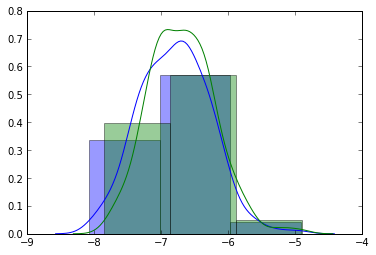

In [22]:
sns.distplot(log_decay_bef, bins=3)
sns.distplot(log_decay_aft, bins=3)

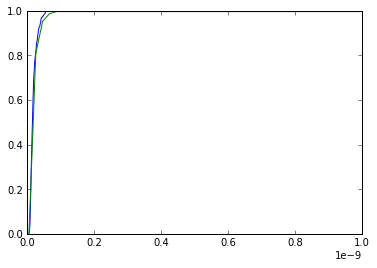

In [23]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(para_bef['amp'])
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(para_aft['amp'])
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft)

(-8.5, -5.5)

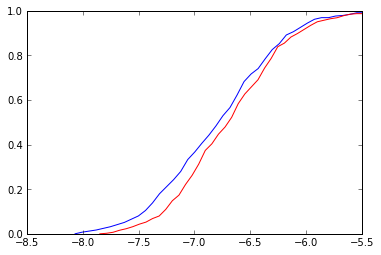

In [24]:
bin_edge_bef, cdf_amp_bef = spon_ana.cdf_gen(log_decay_bef)
bin_edge_aft, cdf_amp_aft = spon_ana.cdf_gen(log_decay_aft)
plt.plot(bin_edge_bef, cdf_amp_bef)
plt.plot(bin_edge_aft, cdf_amp_aft,'r')
plt.xlim([-8.5, -5.5])

In [25]:
import scipy
scipy.stats.ranksums(para_bef['decay_tau'], para_aft['decay_tau'])

RanksumsResult(statistic=-2.7400419854411462, pvalue=0.0061431336369736382)